In [1]:
%load_ext autoreload
%autoreload 2
import sys, os
sys.path.append(os.path.abspath("../../"))
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
from src import (
    PresentationAnalysis,
    SlideAnalysis,
    Config,
    display_chain_outputs
)
from src.chains.chains import FindPdfChain
from src.config.output_formatting import display_presentation_analysis, display_presentation_from_file
from src.testing_utils import EchoLLM
import logging
from src.config.output_formatting import display_search_result_page


from src.rag import ChromaSlideStore, create_slides_database


config = Config()
std_handler = logging.StreamHandler(sys.stdout)
std_handler.setLevel(logging.DEBUG)

log_path = config.navigator.log / "log.log"
file_handler = logging.FileHandler(log_path)

logging.basicConfig(
    handlers=[std_handler, file_handler],
    level=logging.INFO,
)


**Table of contents**<a id='toc0_'></a>    
- [Выводы](#toc1_)    
- [Тесты для одиночных чанков (можно скипнуть)](#toc2_)    
- [Результаты с картинками](#toc3_)    
  - [Слайд с геоданными](#toc3_1_)    
  - [Слайд с субсидиями для сельского хозяйства](#toc3_2_)    
  - [Слайд с мемом про Трампа](#toc3_3_)    
  - [Слайд с графиком и экономическими событиями](#toc3_4_)    
  - [Слайд с круговой диаграммой](#toc3_5_)    
  - [Слайд со столбчатыми диаграмами по месяцам](#toc3_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Выводы](#toc0_)
Работает с запросами по тексту и визуалу.

Замечания:
- Layout and Composition в описании пока ни разу не пригодилось
- В результатах выдается несколько слайдов. В основном, расстояние между первым и вторым большое намного больше, чем между последущими слайдами
- Можно учитывать количество 

# Как я строю Vector Storage
<напишу>

In [18]:
pres_files = config.navigator.interim.rglob("*.json")
pres_objects = [PresentationAnalysis.load(file) for file in pres_files]

In [ ]:
collection_name = "pres0"

# # Uncomment to create from scratch
# storage = create_slides_database(
#     presentations=pres_objects,
#     collection_name=collection_name
# )

storage = ChromaSlideStore("pres0")

Processing '3. Тенденции рынка труда 2024'...
INFO:src.rag.storage:Created 5 chunks for slide 0 of '3. Тенденции рынка труда 2024'


/home/groot/Desktop/projects/global/PresRAG/presentation-rag/src/rag/storage.py:248: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  model=embedding_model if embedding_model else "text-embedding-3-small"


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:src.rag.storage:Created 5 chunks for slide 1 of '3. Тенденции рынка труда 2024'
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:src.rag.storage:Created 5 chunks for slide 2 of '3. Тенденции рынка труда 2024'
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:src.rag.storage:Created 5 chunks for slide 3 of '3. Тенденции рынка труда 2024'
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:src.rag.storage:Created 5 chunks for slide 4 of '3. Тенденции рынка труда 2024'
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:src.rag.storage:Created 5 chunks for slide 5 of '3. Тенденции рынка труда 2024'
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:src.rag.storage:Created 5 chunks for slide 6 of '3. Тенденци

# <a id='toc2_'></a>[Тесты для одиночных чанков (можно скипнуть)](#toc0_)

In [ ]:
results = storage.search_query(
    query="Единорог",
    chunk_types=["visual_content"],
    n_results=10,
    )
results.chunks

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


In [ ]:
results = storage.search_query(
    query="Единорог",
    chunk_types=None,
    n_results=10,
    )
results.chunks

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


[ScoredChunk(document=Document(metadata={'chunk_type': 'visual_content', 'page_num': '14', 'pdf_path': 'data/raw/data-science/yappi-days/Кинозал/2. Пристягина Матрицы компетенций.pdf', 'prompt': '', 'section_category': 'content', 'slide_id': '2. Пристягина Матрицы компетенций__14'}, page_content='На слайде присутствует иллюстрация с изображением единорога, который выглядит недовольным. Единорог находится справа от текста на сером фоне. Слева от него расположен текстовый блок с заголовком и пунктами. Заголовок выделен синим цветом, а текст – черным.'), score=0.5106502175331116),
 ScoredChunk(document=Document(metadata={'chunk_type': 'visual_content', 'page_num': '12', 'pdf_path': 'data/raw/data-science/yappi-days/Кинозал/2. Пристягина Матрицы компетенций.pdf', 'prompt': '', 'section_category': 'content', 'slide_id': '2. Пристягина Матрицы компетенций__12'}, page_content='На слайде изображен мультяшный единорог с недовольным выражением лица. Он одет в голубую футболку и поднял одну р

In [56]:
results = storage.search_query(
    query="Презентация про матрицы компетенций с картинкой единорога",
    chunk_types=None,
    n_results=10,
    )
results.chunks

INFO:openai._base_client:Retrying request to /embeddings in 0.473099 seconds
INFO:openai._base_client:Retrying request to /embeddings in 0.771248 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


[ScoredChunk(document=Document(metadata={'chunk_type': 'topic_overview', 'page_num': '34', 'pdf_path': 'data/raw/data-science/yappi-days/Кинозал/2. Пристягина Матрицы компетенций.pdf', 'prompt': '', 'section_category': 'general_description', 'slide_id': '2. Пристягина Матрицы компетенций__34'}, page_content='Тема: Компетенции в организации\nЦель: Объяснить концепцию матрицы компетенций\nКлючевая информация: Определение матрицы компетенций и ее значение для должностей.'), score=0.3690198063850403),
 ScoredChunk(document=Document(metadata={'chunk_type': 'topic_overview', 'page_num': '35', 'pdf_path': 'data/raw/data-science/yappi-days/Кинозал/2. Пристягина Матрицы компетенций.pdf', 'prompt': '', 'section_category': 'general_description', 'slide_id': '2. Пристягина Матрицы компетенций__35'}, page_content='Тема: Развитие компетенций сотрудников\nЦель: Подчеркнуть важность матрицы компетенций и пути развития сотрудников\nКлючевая информация: Определение матрицы компетенций и ее роль в ра

In [57]:
results.chunks[0]

ScoredChunk(document=Document(metadata={'chunk_type': 'topic_overview', 'page_num': '34', 'pdf_path': 'data/raw/data-science/yappi-days/Кинозал/2. Пристягина Матрицы компетенций.pdf', 'prompt': '', 'section_category': 'general_description', 'slide_id': '2. Пристягина Матрицы компетенций__34'}, page_content='Тема: Компетенции в организации\nЦель: Объяснить концепцию матрицы компетенций\nКлючевая информация: Определение матрицы компетенций и ее значение для должностей.'), score=0.3690198063850403)

In [58]:
results = storage.search_query(
    query="Презентация про безопасность LLM",
    chunk_types=None,
    n_results=10,
    )
results.chunks

INFO:openai._base_client:Retrying request to /embeddings in 0.436416 seconds
INFO:openai._base_client:Retrying request to /embeddings in 0.946549 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


[ScoredChunk(document=Document(metadata={'chunk_type': 'topic_overview', 'page_num': '0', 'pdf_path': 'data/raw/data-science/aiconf/День1/1.Сфера/4.Обзор уязвимостей и техник защиты для LLM_Евгений Кокуйкин_вер.3.pdf', 'prompt': '', 'section_category': 'general_description', 'slide_id': '4.Обзор уязвимостей и техник защиты для LLM_Евгений Кокуйкин_вер.3__0'}, page_content='Тема: Обзор уязвимостей и техник защиты для LLM\nЦель: Представить информацию о безопасности LLM\nКлючевая информация: Введение в уязвимости и методы защиты.'), score=0.23468691110610962),
 ScoredChunk(document=Document(metadata={'chunk_type': 'topic_overview', 'page_num': '30', 'pdf_path': 'data/raw/data-science/aiconf/День1/1.Сфера/4.Обзор уязвимостей и техник защиты для LLM_Евгений Кокуйкин_вер.3.pdf', 'prompt': '', 'section_category': 'general_description', 'slide_id': '4.Обзор уязвимостей и техник защиты для LLM_Евгений Кокуйкин_вер.3__30'}, page_content='Тема: Обсуждение потенциальных угроз, связанных с обучени

In [ ]:
results = storage.search_query(
    query="Презентация в которой показывали карту грузовых маршрутов для поездов",
    chunk_types=None,
    n_results=10,
    )
results.chunks

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


[ScoredChunk(document=Document(metadata={'chunk_type': 'topic_overview', 'page_num': '10', 'pdf_path': 'data/raw/business/business_incognita/Kept_Подвижной состав РФ_2024 (20 стр).pdf', 'prompt': '', 'section_category': 'general_description', 'slide_id': 'Kept_Подвижной состав РФ_2024 (20 стр)__10'}, page_content='Тема: Грузовые ж/д маршруты в России\nЦель: Показать основные направления грузоперевозок и их динамику\nКлючевая информация: Экспорт угля из Кузбасса по основным маршрутам'), score=0.43732643127441406),
 ScoredChunk(document=Document(metadata={'chunk_type': 'visual_content', 'page_num': '10', 'pdf_path': 'data/raw/business/business_incognita/Kept_Подвижной состав РФ_2024 (20 стр).pdf', 'prompt': '', 'section_category': 'content', 'slide_id': 'Kept_Подвижной состав РФ_2024 (20 стр)__10'}, page_content='На слайде представлена карта России с основными грузовыми ж/д маршрутами. \n\n1. Основная карта: \n   - На карте выделены три бассейна: Северо-Западный, Азово-Черноморский и Дал


---

# <a id='toc3_'></a>[Результаты с картинками](#toc0_)
## <a id='toc3_1_'></a>[Слайд с геоданными](#toc0_)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
Slide from: Kept_Подвижной состав РФ_2024 (20 стр).pdf
Page: 11
--------------------------------------------------------------------------------


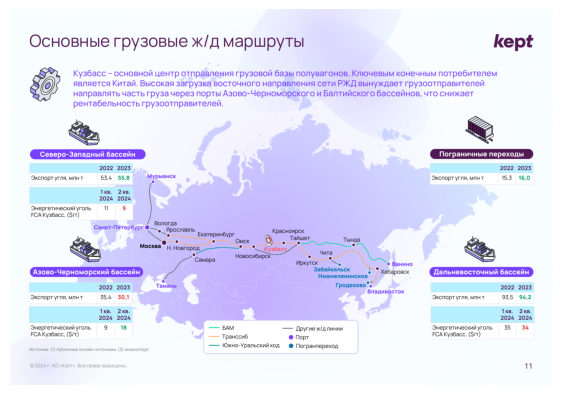


Best matching chunk (topic_overview):
Distance: 0.437
--------------------------------------------------------------------------------
Тема: Грузовые ж/д маршруты в России
Цель: Показать основные направления грузоперевозок и их динамику
Ключевая информация: Экспорт угля из Кузбасса по основным маршрутам

Chunk distances:
--------------------------------------------------------------------------------
text_content: distance: 0.541
visual_content: distance: 0.476
topic_overview: distance: 0.437
conclusions_and_insights: not matched
layout_and_composition: not matched

Full slide content:
--------------------------------------------------------------------------------

text_content:
Заголовок: "Основные грузовые ж/д маршруты"

Подзаголовок: "Кузбасс – основной центр отправления грузовой базы полувагонов. Ключевым конечным потребителем является 
Китай. Высокая загрузка восточного направления сети РЖД вынуждает грузоперевозчиков направлять часть груза через порты 
Азово-Черноморского и Бал

In [77]:
results = storage.search_query_pages(
    query="Презентация в которой показывали карту грузовых маршрутов для поездов",
    n_results=4,
    )
display_search_result_page(results[0])

In [65]:
res = results[0]
print(res.best_score)
print(res.chunk_distances)

0.43732643127441406
{'text_content': 0.5408470630645752, 'visual_content': 0.4760860800743103, 'topic_overview': 0.43732643127441406, 'conclusions_and_insights': None, 'layout_and_composition': None}


In [69]:
[(r.slide_id, r.best_score) for r in results]

[('Kept_Подвижной состав РФ_2024 (20 стр)__10', 0.43732643127441406),
 ('Kept_Подвижной состав РФ_2024 (20 стр)__8', 0.48226398229599),
 ('Kept_Подвижной состав РФ_2024 (20 стр)__11', 0.4989626407623291),
 ('Kept_Подвижной состав РФ_2024 (20 стр)__9', 0.5302501916885376)]

Note: Резница между первым и вторым намного больше, чем между вторым и третьим

In [67]:
results[1].matched_chunk

ScoredChunk(document=Document(metadata={'chunk_type': 'topic_overview', 'page_num': '8', 'pdf_path': 'data/raw/business/business_incognita/Kept_Подвижной состав РФ_2024 (20 стр).pdf', 'prompt': '', 'section_category': 'general_description', 'slide_id': 'Kept_Подвижной состав РФ_2024 (20 стр)__8'}, page_content='Тема: Основные наблюдения\nЦель: Представить ключевые выводы или наблюдения по теме, связанной с транспортом или логистикой.\nКлючевая информация: Визуализация с использованием элементов поезда для акцента на теме.'), score=0.48226398229599)


---


## <a id='toc3_2_'></a>[Слайд с субсидиями для сельского хозяйства](#toc0_)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
Slide from: SP_Навигатор_по_мерам_гос_поддержки_2024_74_стр.pdf
Page: 23
--------------------------------------------------------------------------------


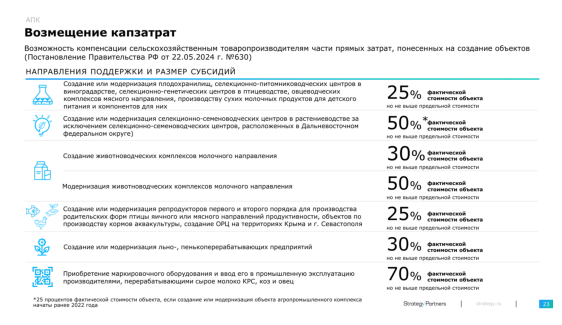


Best matching chunk (topic_overview):
Distance: 0.417
--------------------------------------------------------------------------------
Тема: Возмещение капитальных затрат в сельском хозяйстве
Цель: Информировать о возможностях компенсации затрат для сельскохозяйственных товаропроизводителей
Ключевая информация: Подробности о направлениях поддержки и размере субсидий.

Chunk distances:
--------------------------------------------------------------------------------
text_content: not matched
visual_content: not matched
topic_overview: distance: 0.417
conclusions_and_insights: distance: 0.511
layout_and_composition: not matched

Full slide content:
--------------------------------------------------------------------------------

text_content:
Заголовок: "Возмещение капитальных затрат"

Основной текст: "Возможность компенсации сельскохозяйственным товаропроизводителям части прямых затрат, понесенных на 
создание объектов (Постановление Правительства РФ от 22.05.2024 г. №630)"

Направления

In [ ]:
results = storage.search_query_pages(
    query="Презентация в которой рассматривались субсидии для сельского хозяйства",
    n_results=4,
    )
display_search_result_page(results[0])

## <a id='toc3_3_'></a>[Слайд с мемом про Трампа](#toc0_)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
Slide from: 4.Обзор уязвимостей и техник защиты для LLM_Евгений Кокуйкин_вер.3.pdf
Page: 15
--------------------------------------------------------------------------------


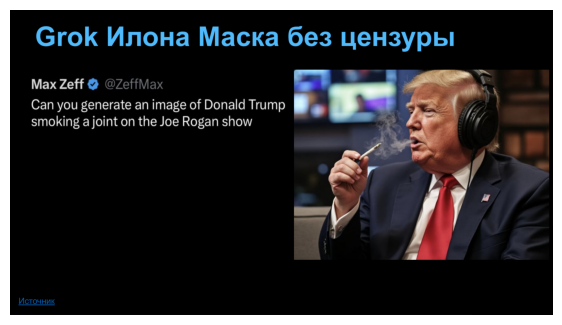


Best matching chunk (topic_overview):
Distance: 0.504
--------------------------------------------------------------------------------
Тема: Обсуждение Илонa Маска и его влияния на общественное мнение.
Цель: Показать провокационный твит о Дональде Трампе.
Ключевая информация: Визуализация взаимодействия между известными личностями и их влиянием на медиа.

Chunk distances:
--------------------------------------------------------------------------------
text_content: distance: 0.662
visual_content: distance: 0.533
topic_overview: distance: 0.504
conclusions_and_insights: not matched
layout_and_composition: not matched

Full slide content:
--------------------------------------------------------------------------------

text_content:
Заголовок: "Grok Илонa Маска без цензуры"

Текст твита:
Max Zeff @ZeффMax
"Can you generate an image of Donald Trump smoking a joint on the Joe Rogan show"

Стилизация текста: заголовок выполнен крупным шрифтом синего цвета, что привлекает внимание к основно

In [ ]:
results = storage.search_query_pages(
    query="Презентация в которой был мем с Трампом",
    n_results=4,
    )
display_search_result_page(results[0])

## <a id='toc3_4_'></a>[Слайд с графиком и экономическими событиями](#toc0_)

Slide from: ЯиП_Энергетический_переход_Вызовы_и_возможности_для_России.pdf
Page: 5
--------------------------------------------------------------------------------


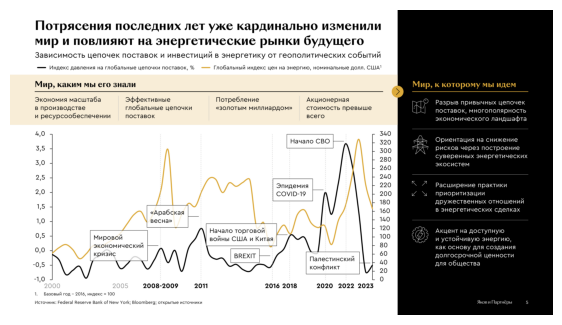


Best matching chunk (topic_overview):
Distance: 0.458
--------------------------------------------------------------------------------
Тема: Влияние геополитических событий на энергетические рынки
Цель: Показать взаимосвязь между глобальными событиями, цепочками поставок и ценами на энергоносители
Ключевая информация: Сравнение прошлого и будущего состояния энергетических рынков

Chunk distances:
--------------------------------------------------------------------------------
text_content: not matched
visual_content: distance: 0.491
topic_overview: distance: 0.458
conclusions_and_insights: not matched
layout_and_composition: not matched

Full slide content:
--------------------------------------------------------------------------------

text_content:
Основной заголовок: "Потрясения последних лет уже кардинально изменили мир и повлияют на энергетические рынки будущего"

Подзаголовок: "Зависимость цепочек поставок и инвестиций в энергетике от геополитических событий"

Текстовые блоки:


In [ ]:
results = storage.search_query_pages(
    query="В какой презентации был график, отражающий влияние экономических событий на цены",
    n_results=4,
    )
display_search_result_page(results[0])

Slide from: ЯиП_Энергетический_переход_Вызовы_и_возможности_для_России.pdf
Page: 5
--------------------------------------------------------------------------------


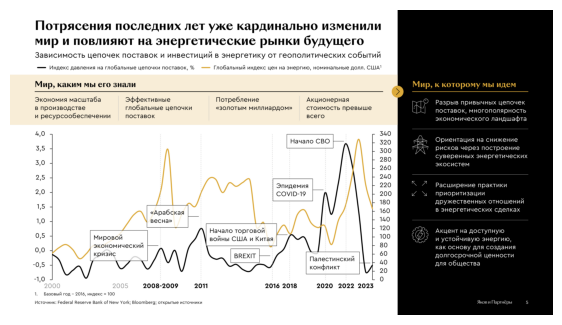


Best matching chunk (topic_overview):
Distance: 0.481
--------------------------------------------------------------------------------
Тема: Влияние геополитических событий на энергетические рынки
Цель: Показать взаимосвязь между глобальными событиями, цепочками поставок и ценами на энергоносители
Ключевая информация: Сравнение прошлого и будущего состояния энергетических рынков

Chunk distances:
--------------------------------------------------------------------------------
text_content: not matched
visual_content: distance: 0.491
topic_overview: distance: 0.481
conclusions_and_insights: not matched
layout_and_composition: not matched

Full slide content:
--------------------------------------------------------------------------------

text_content:
Основной заголовок: "Потрясения последних лет уже кардинально изменили мир и повлияют на энергетические рынки будущего"

Подзаголовок: "Зависимость цепочек поставок и инвестиций в энергетике от геополитических событий"

Текстовые блоки:


In [ ]:
display_search_result_page(results[2])

## <a id='toc3_5_'></a>[Слайд с круговой диаграммой](#toc0_)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
Slide from: AXES_х_Понимаю_Исследование_практик_благополучия_2024.pdf
Page: 5
--------------------------------------------------------------------------------


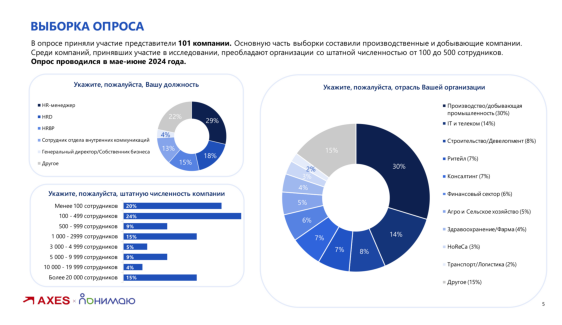


Best matching chunk (visual_content):
Distance: 0.389
--------------------------------------------------------------------------------
На слайде представлены три круговые диаграммы, каждая из которых иллюстрирует разные аспекты опроса.

1. Первая диаграмма (слева) показывает распределение по должностям участников опроса:
   - HR-менеджер (29%)
   - HRD (22%)
   - HRBP (15%)
   - Сотрудник отдела внутренних коммуникаций (13%)
   - Генеральный директор/Собственник бизнеса (4%)
   - Другое (15%)
   Диаграмма выполнена в синих и серых тонах, с выделением сектора HR-менеджеров.

2. Вторая диаграмма (в центре) отображает штатную численность компаний:
   - Менее 100 сотрудников (20%)
   - 100 - 499 сотрудников (24%)
   - 500 - 999 сотрудников (9%)
   - 1000 - 2999 сотрудников (15%)
   - 3000 - 9999 сотрудников (5%)
   - 10000 и более сотрудников (0%)
   Цветовая схема аналогична первой диаграмме.

3. Третья диаграмма (справа) показывает отраслевую принадлежность организаций:
   - Производств

In [ ]:
results = storage.search_query_pages(
    query="На слайде были результаты опроса насчет отрасли в виде кругвой диаграммы",
    n_results=4,
    )
display_search_result_page(results[0])

## <a id='toc3_6_'></a>[Слайд со столбчатыми диаграмами по месяцам](#toc0_)

INFO:openai._base_client:Retrying request to /embeddings in 0.475643 seconds
INFO:openai._base_client:Retrying request to /embeddings in 0.838246 seconds
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
Slide from: dodo-brands-monthly-trading-update-sep-2024.pdf
Page: 13
--------------------------------------------------------------------------------


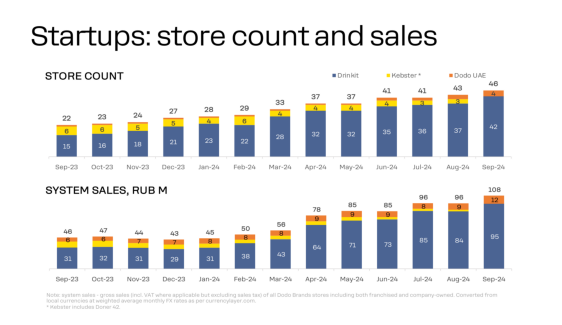


Best matching chunk (visual_content):
Distance: 0.402
--------------------------------------------------------------------------------
Слайд содержит две горизонтальные столбчатые диаграммы, расположенные одна над другой.

1. Первая диаграмма (Количество магазинов):
   - Ось X: месяцы с сентября 2023 по сентябрь 2024.
   - Ось Y: количество магазинов.
   - Столбцы для трех компаний: Drinkit (синий), Kebster (желтый), Dodo UAE (серый).
   - Наивысший столбец в марте 2024 для Drinkit (33 магазина).
   - Подписи значений на верхней части столбцов.

2. Вторая диаграмма (Системные продажи, RUB M):
   - Ось X: те же месяцы.
   - Ось Y: системные продажи в миллионах рублей.
   - Столбцы для трех компаний: Drinkit (синий), Kebster (желтый), Dodo UAE (серый).
   - Наивысший столбец в сентябре 2024 для Dodo UAE (108 миллионов рублей).
   - Подписи значений на верхней части столбцов.

Chunk distances:
--------------------------------------------------------------------------------
text_content: 

In [ ]:
results = storage.search_query_pages(
    "Презентация со столбчатыми диаграмами продаж по месяцам"
)
display_search_result_page(results[0])